# Integrated Project 1 <a id='intro'></a>

## Project Description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. 

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Instructions on Completing the Project

### Step 1: Open the Data File and Study the General Information
- File path: 
  - /datasets/games.csv

### Step 2: Prepare the Data
- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
  - Explain why you filled in the missing values as you did or why you decided to leave them blank.
  - Why do you think the values are missing? Give possible reasons.
  - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

### Step 3: Analyze the Data
- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

### Step 4: Create User Profile for Each Region
- For each region (NA, EU, JP), determine:
  - The top five platforms. Describe variations in their market shares from region to region.
  - The top five genres. Explain the difference.
  - Do ESRB ratings affect sales in individual regions?

### Step 5: Test Hypotheses
- Average user ratings of the Xbox One and PC platforms are the same. 
- Average user ratings for the Action and Sports genres are different.
- Set the alpha threshold value yourself.
- Explain:
  - How you formulated the null and alternative hypotheses 
  - What significance level you chose to test the hypotheses, and why

### Step 6: Write General Conclusion

## Data Description
- Name 
- Platform 
- Year_of_Release 
- Genre
- NA_sales (North American sales in USD million) 
- EU_sales (sales in Europe in USD million) 
- JP_sales (sales in Japan in USD million) 
- Other_sales (sales in other countries in USD million) 
- Critic_Score (maximum of 100) 
- User_Score (maximum of 10) 
- Rating (ESRB)

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

## Load data

In [2]:
# Load the data file into a data frame
try:
    # Try to read the CSV file from the local path.
    games_df = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_5/Integrated_Project_1/datasets/games.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        games_df = pd.read_csv('/datasets/games.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


## Prepare data

In [3]:
# Print the general/summary information about the data frame
print("GAMES DATA FRAME INFO:")
games_df.info()
print()

print("PERCENTAGE OF NULL VALUES:")
print(games_df.isnull().sum()/len(games_df))
print()

print("GAMES DATA FRAME:")
display(games_df)
print()

GAMES DATA FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

PERCENTAGE OF NULL VALUES:
Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.0

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
# Rename columns so they are all lowercase
games_df.rename(columns=str.lower, inplace=True)
print(games_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Let's address the handling of missing values and the conversion of columns containing incorrect data types, starting with the 'name' and 'genre' columns. Both the 'name' and 'genre' columns contain only two null values each. Considering the small proportion of missing values compared to the entirety of the dataset, we will enhance data completeness and integrity by removing these specific entries from the dataset.

In [5]:
# Replace missing values
games_df.dropna(subset=['name'], inplace=True)
games_df.dropna(subset=['genre'], inplace=True)

display(games_df.sample(5))
print(games_df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5835,BlazBlue: Chrono Phantasma,PS3,2013.0,Fighting,0.14,0.00,0.14,0.03,83.0,8.3,T
13074,Winning Post 7 2010,PSP,2010.0,Sports,0.00,0.00,0.05,0.00,NaN,NaN,NaN
10284,PDC World Championship Darts: Pro Tour,Wii,2010.0,Sports,0.00,0.09,0.00,0.01,NaN,NaN,NaN
3100,Tiger Woods PGA Tour 09,PS3,2008.0,Sports,0.34,0.22,0.00,0.10,82.0,7.2,E
4332,Tekken Advance,GBA,2001.0,Fighting,0.32,0.12,0.00,0.01,82.0,8.2,T


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None



Now that the 'name' and 'genre' columns contain only non-null values, let's proceed to address the 'year_of_release' column.

This column presently contains some null values. To ensure consistency and proper data representation throughout the dataset, we will convert the values in the 'year_of_release' column to date-time data types as well as drop any null values as they do not make up a significant portion of the date.

In [6]:
# Drop the null values
games_df.dropna(subset=['year_of_release'], inplace=True)

# Convert the column to date-time data type
games_df['year_of_release'] = pd.to_datetime(games_df['year_of_release'], format='%Y')
games_df['year_of_release'] = games_df['year_of_release'].dt.year.astype(int)

display(games_df.sample(5))
print(games_df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13432,Wonder World Amusement Park,Wii,2008,Misc,0.04,0.00,0.00,0.00,37.0,4.5,E
8309,Thief: Deadly Shadows,XB,2004,Action,0.13,0.04,0.00,0.01,82.0,7.3,M
12009,Shounen Sunday x Shounen Magazine: Nettou! Dre...,DS,2009,Sports,0.00,0.00,0.07,0.00,NaN,NaN,NaN
5523,SSX Blur,Wii,2007,Sports,0.29,0.01,0.00,0.03,74.0,8.1,E
15590,Katekyoo Hitman Reborn! Dream Hyper Battle!,PS2,2007,Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


We have successfully addressed the 'year_of_release' column by dropping the missing years and converting the non-null values to the proper data type. Now, let's turn our attention to the 'critic_score' column.

Approximately half of the 'critic_score' column contains missing values. We will fix this by replacing these values with a single placeholder (0). This approach will help us maintain the overall distribution and reliability of our dataset during analysis.

In [7]:
# Replace missing 'critic_score' values with the average critic score rating of games within the data frame
games_df['critic_score'].fillna(-1, inplace=True)

display(games_df.sample(5))
print(games_df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7974,Fairy Fencer F,PS3,2013,Role-Playing,0.05,0.03,0.09,0.02,65.0,7.4,T
14485,Mother Goose no Himitsu no Yakata,PSP,2011,Adventure,0.00,0.00,0.03,0.00,-1.0,NaN,NaN
5626,Vin Diesel: Wheelman,PS3,2009,Racing,0.12,0.14,0.00,0.05,-1.0,NaN,NaN
12301,Bleach: Versus Crusade,Wii,2008,Fighting,0.00,0.00,0.06,0.00,-1.0,NaN,NaN
13802,PD Ultraman Battle Collection 64,N64,1999,Strategy,0.00,0.00,0.04,0.00,-1.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


The 'critic_score' column has been successfully corrected. Now, let's address the 'user_score' column, which contains missing values and values of an incorrect data type. Additionally, some entries contain the value 'tbd', which is not acceptable for our analysis. We will handle these 'tbd' values in the same way as the missing values by replacing them with a placeholder value (0). This will ensure consistency and accuracy in our data analysis.

In [8]:
# Replace missing and unacceptable 'user_score' values with the average user score rating of games within the data frame
games_df['user_score'] = games_df['user_score'].replace('tbd', -1)
games_df['user_score'].fillna(-1, inplace=True)
games_df['user_score'] = games_df['user_score'].astype(float)

display(games_df.sample(5))
print(games_df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8116,Squeeballs Party,Wii,2009,Puzzle,0.17,0.00,0.00,0.01,59.0,-1.0,E10+
9310,Avatar: The Last Airbender - The Burning Earth,X360,2007,Action,0.11,0.01,0.00,0.01,-1.0,-1.0,NaN
8739,Pressure Cooker,2600,1982,Action,0.14,0.01,0.00,0.00,-1.0,-1.0,NaN
2023,Shrek 2,GC,2004,Platform,0.73,0.26,0.01,0.03,70.0,6.4,E
12503,The Next BIG Thing,PC,2011,Adventure,0.00,0.05,0.00,0.01,75.0,7.9,E10+


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


The 'user_score' column is now ready for analysis. Finally, let's address the 'rating' column.

Approximately half of the entries in the 'rating' column missing. To address this issue, we'll fill in the missing values with a placeholder to represent unknown ratings ('U').

In [9]:
# Replace missing 'rating' values with ratings most associated with each game genre
games_df['rating'].fillna('U', inplace=True)

display(games_df.sample(5))
print(games_df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15526,Sega Ages 2500 Series Vol. 32: Phantasy Star C...,PS2,2008,Role-Playing,0.00,0.00,0.02,0.00,-1.0,-1.0,U
426,Baseball,NES,1983,Sports,0.73,0.10,2.35,0.02,-1.0,-1.0,U
11304,Famicom Mini: Mario Bros.,GBA,2004,Platform,0.00,0.00,0.08,0.00,-1.0,-1.0,U
15306,Rose to Tasogare no Kojou,PSV,2016,Action,0.00,0.00,0.02,0.00,-1.0,-1.0,U
5842,Burnout,GC,2002,Racing,0.23,0.06,0.00,0.01,78.0,7.9,E


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


With the data now refined, we have an opportunity to enhance its depth by calculating total sales for each game. This involves aggregating sales figures from all regions and consolidating them into a singular metric. By creating a dedicated column to house these aggregated values, we'll be able to glean a more comprehensive understanding of each game's commercial performance.

In [10]:
# Calculate the total number of sales for each game
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

display(games_df.sample(5))
print(games_df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
249,Tony Hawk's Pro Skater 3,PS2,2001,Sports,2.66,1.29,0.01,0.46,97.0,7.5,T,4.42
770,R.C. Pro-Am,NES,1988,Racing,1.47,0.38,0.19,0.10,-1.0,-1.0,U,2.14
12703,Teenage Mutant Ninja Turtles II: Back from the...,GB,1991,Action,0.00,0.00,0.06,0.00,-1.0,-1.0,U,0.06
10297,NBA Live 16,XOne,2015,Sports,0.09,0.01,0.00,0.01,60.0,5.6,E,0.11
8317,Country Dance: All Stars,X360,2012,Action,0.16,0.00,0.00,0.01,-1.0,5.2,E10+,0.17


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None


The data is now ready for analysis!

## Analyze Data

We will start our analysis by examining the number of game releases across different years. This will help us identify the time period with the most significant data.

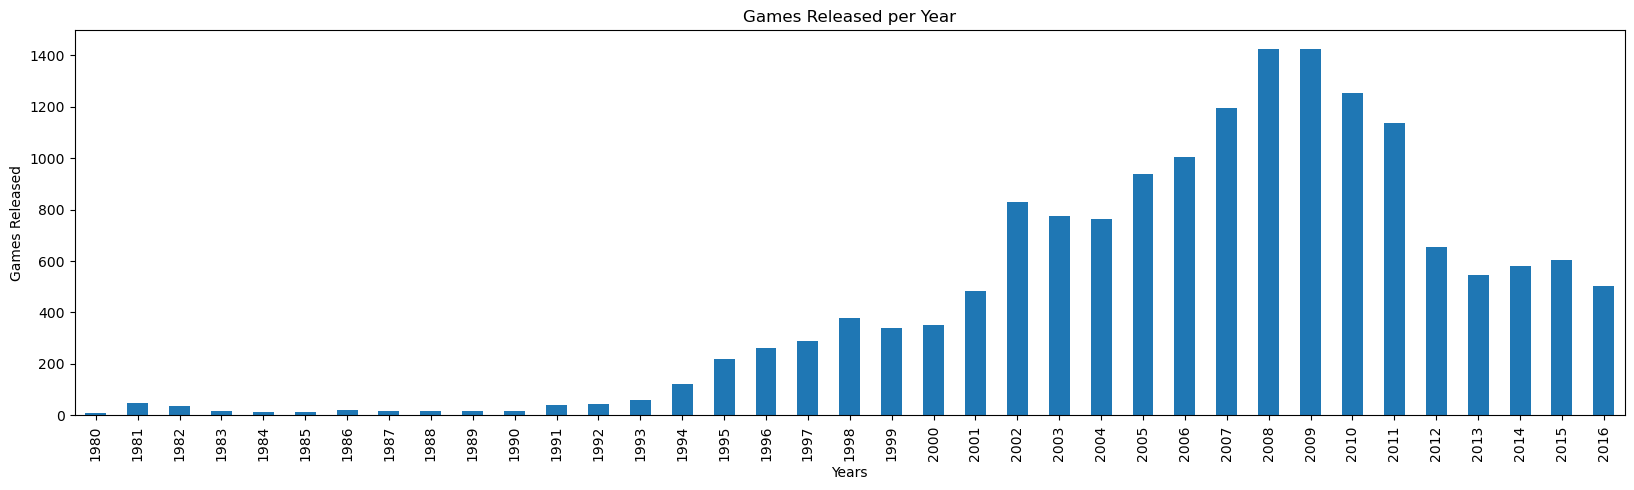

In [11]:
plt.figure(figsize=(20, 5))
games_df['year_of_release'].value_counts().sort_index().plot(kind='bar', title='Games Released per Year', xlabel='Years', ylabel='Games Released')
plt.show()

The visualization illustrates a clear trend in game releases over the years. Starting in the early 1990s, there was a gradual increase in the number of games released. This trend continued to rise sharply from the early 2000s, marking a significant boom in the gaming industry. The peak of this surge occurred in 2008 and 2009, after which there has been a steady decline in the number of game releases. The most significant and relevant data spans from 2000 to 2016, capturing the period where the majority of game releases occurred.

Now we will observe how sales varied platform by platform.

<Axes: title={'center': 'Total Game Sales for Each Platform'}, xlabel='Platforms', ylabel='Total Game Sales (Millions)'>

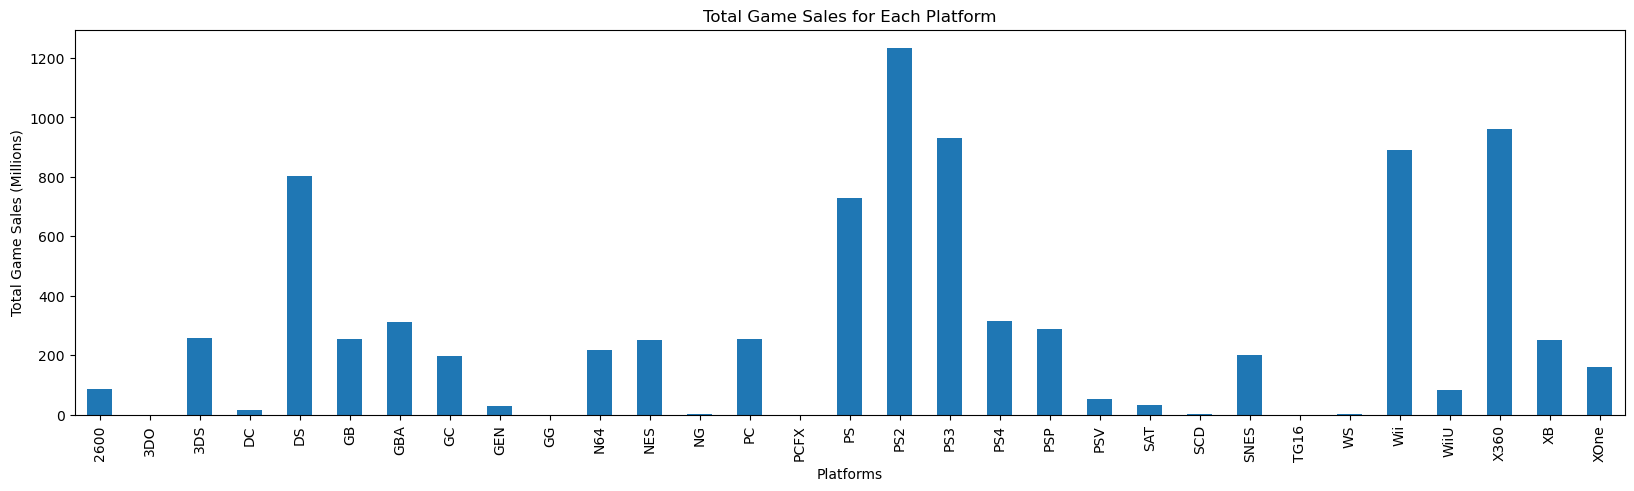

In [12]:
plt.figure(figsize=(20, 5))
games_df.groupby('platform')['total_sales'].sum().sort_index().plot(kind='bar', title='Total Game Sales for Each Platform', xlabel='Platforms', ylabel='Total Game Sales (Millions)')

As observed, the top five gaming consoles in terms of sales are the PS2, Xbox 360, PS3, Wii, and DS, in that order. This information will be instrumental in furthering our investigation.

We will analyze the total annual sales of these top platforms from the year 2000 onward by building a distribution.

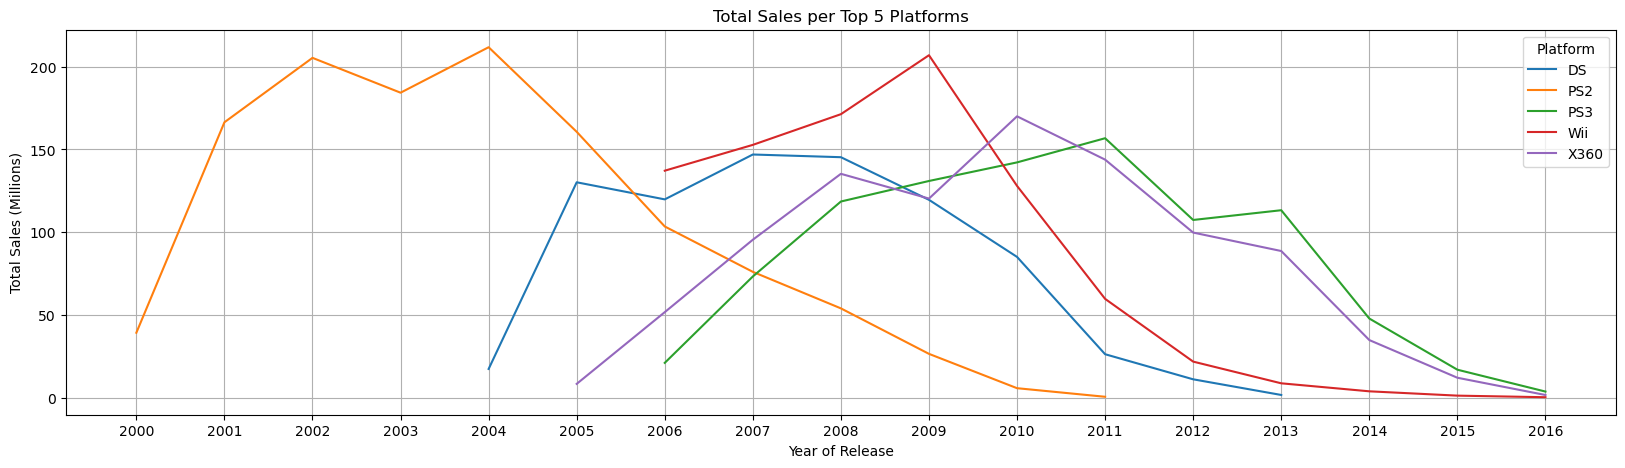

In [13]:
# Group by year_of_release and platform, then sum total sales
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_5_plats = platform_sales.head(5)


# Filter the original DataFrame so that it only contains the top 5 platforms
top_5_games_df = games_df[games_df['platform'].isin(top_5_plats.keys()) & (games_df['platform'].isin(top_5_plats.keys()) & (games_df['year_of_release'] >= 2000))]
platform_sales_df = top_5_games_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()


fig, ax = plt.subplots(figsize=(20, 5))

# Plot each platform's total sales by year
for platform in platform_sales_df.columns:
    ax.plot(platform_sales_df.index, platform_sales_df[platform], label=platform)

plt.title('Total Sales per Top 5 Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform')

# Set x-axis to diaplye years
ax.set_xticks(platform_sales_df.index)
ax.set_xticklabels(platform_sales_df.index)

plt.grid(True)
plt.show()

From the analysis of the line graph, it's evident that the PS2 enjoyed an exceptional longevity compared to other leading platforms. However, its sales trajectory started a steady decline post-2004, continuing further after the release of the PS3, which was marketed as an upgraded version. Conversely, the Wii demonstrated a robust start, generating nearly $150 million in sales during its debut year. This surge can be attributed to its innovative gaming mechanics, which captured widespread interest. The remaining platforms followed a similar trend of sales steadily increasing, reaching peaks around the 3-4 year mark, and then gradually declining.

To enhance the relevance of our analysis and improve the accuracy of our sales projections for 2017, we will narrow our dataset to focus on the period from 2013 to 2016. By concentrating on this more recent timeframe, we can avoid the inclusion of outdated trends that might skew our predictions. This refined dataset will enable us to more precisely assess how platforms and games performed in terms of sales, providing clearer insights for forecasting future trends.

In [14]:
# Filter the data frame to include only relevant data
games_df = games_df[(games_df['year_of_release'] >= 2013)]
print(games_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB
None


### Difference in Sales by Platform

We will build a box plot for the global sales of all games, broken down by platform. to explore whether or not the differences in sales significant.

<Figure size 640x480 with 0 Axes>

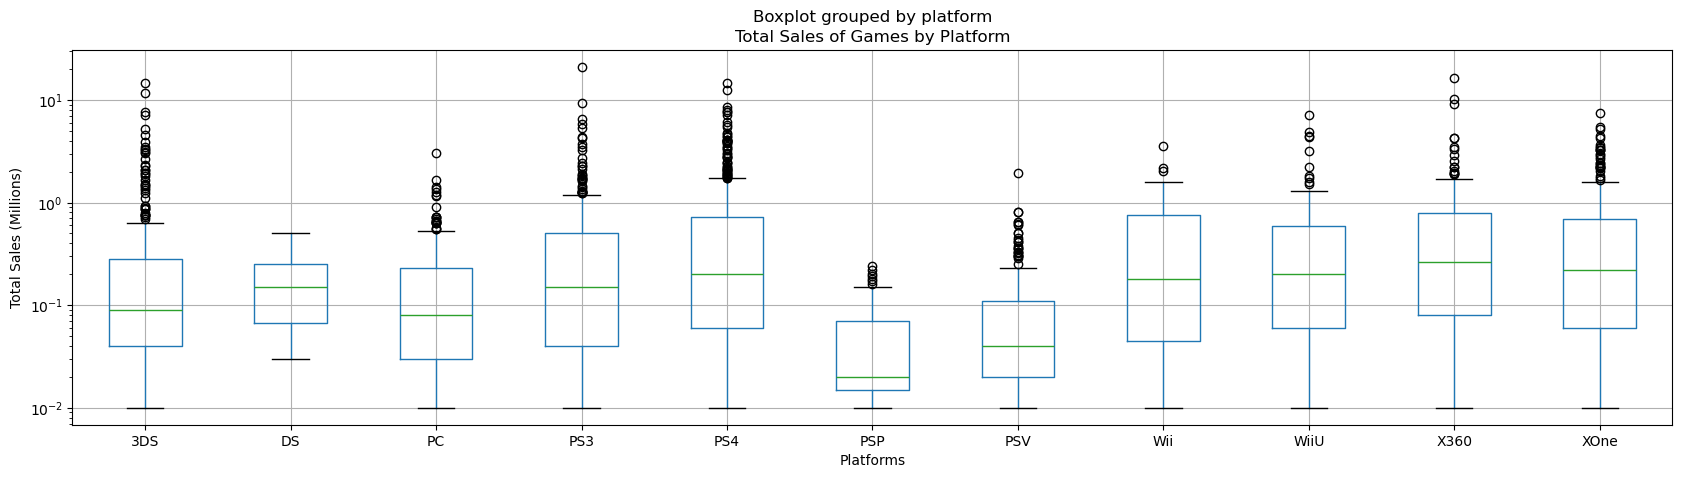

,mean,median,std,var
,total_sales,total_sales,total_sales,total_sales
platform,,,,
3DS,0.472772,0.090,1.381347,1.908119
DS,0.192500,0.150,0.172026,0.029593
PC,0.208624,0.080,0.352304,0.124118
PS3,0.525884,0.150,1.451939,2.108128
PS4,0.801378,0.200,1.609456,2.590350
PSP,0.052239,0.020,0.059768,0.003572
PSV,0.092151,0.040,0.153816,0.023660
Wii,0.593913,0.180,0.915432,0.838016


In [15]:
# Plot box plots for each gaming platform to meaure difference in sales
plt.figure()
games_df.boxplot(column='total_sales', by='platform', figsize=(20, 5))
plt.title('Total Sales of Games by Platform')
plt.xlabel('Platforms')
plt.ylabel('Total Sales (Millions)')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

# Calculate the mean, median, std dev and variance of the total sales by platform
games_df.pivot_table(index='platform', values=['total_sales'], aggfunc=['mean', 'median', 'std', 'var'])

The viusalization and the pivot table above offer comprehensive insights into the total sales performance across various gaming platforms. 

The median total sales as seen in the box plot and pivot table above provide a measure of the central tendency and are particularly useful for understanding the distribution of sales data, especially in the presence of outliers. Platforms like the Wii, with a median total sales higher than its mean, suggest that sales data may be positively skewed, indicating a few highly successful games driving overall sales. This can be seen in the box plot visualization for the Wii.

The mean total sales serve as a measure of average sales volume on each platform, indicating relative popularity or market success. Platforms with higher mean total sales, such as the PS4, signify stronger overall sales performance. Conversely, those with lower mean sales, like GBA or XB, may have less market share or appeal.

 Standard deviation measures the variability or dispersion of total sales around the mean, with higher values suggesting greater fluctuation in sales performance across different games. For instance, the Wii platform exhibits the highest standard deviation and variance, implying significant variability in sales figures. Meanwhile, platforms like DS, PS3, and X360 show relatively high mean total sales, underscoring their significance in the gaming market. 
 
 This data aids in understanding sales dynamics and market positioning across gaming platforms, facilitating informed strategic decisions within the industry.

### Do Reviews Affect Sales?

Let's examine how user and professional reviews influence sales for Xbox 360 games. We will create scatter plots for user scores and critic scores, and calculate the correlation between reviews and sales for each plot. Let's begin with Critic Scores.

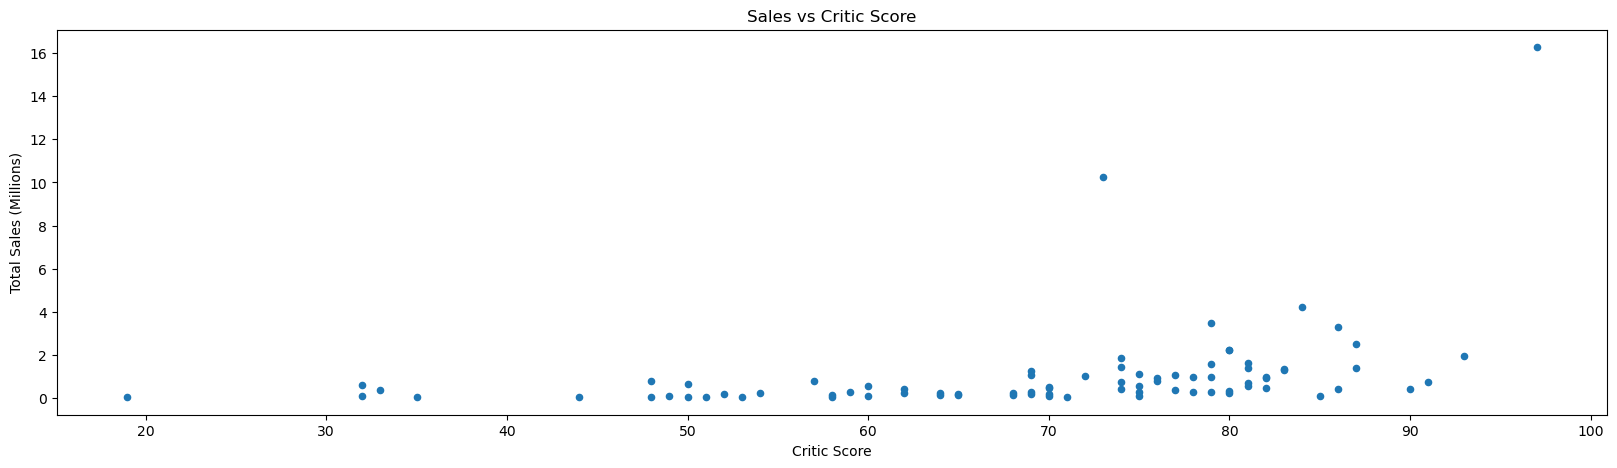

Correlation Coefficent (Sales vs Critic Score): 0.3503445460228664


In [16]:
# Plotting the first scatter plot with 'critic_score' on x-axis and 'total_sales' on y-axis
x360_critic = games_df[(games_df['platform'] == 'X360') & (games_df['critic_score'] != -1)]
fig, ax = plt.subplots(figsize=(20, 5))
x360_critic.plot(x='critic_score', y='total_sales', kind='scatter', title='Sales vs Critic Score', ax=ax)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

print("Correlation Coefficent (Sales vs Critic Score):", x360_critic['critic_score'].corr(x360_critic['total_sales']))

Based on the scatterplot and the correlation coefficient of 0.35, it is evident that there is not a strong relationship between sales and critic scores. This suggests that a positive critic review does not necessarily translate into higher sales for a game, and vice versa. Let's investigate whether this trend holds true for user reviews as well.

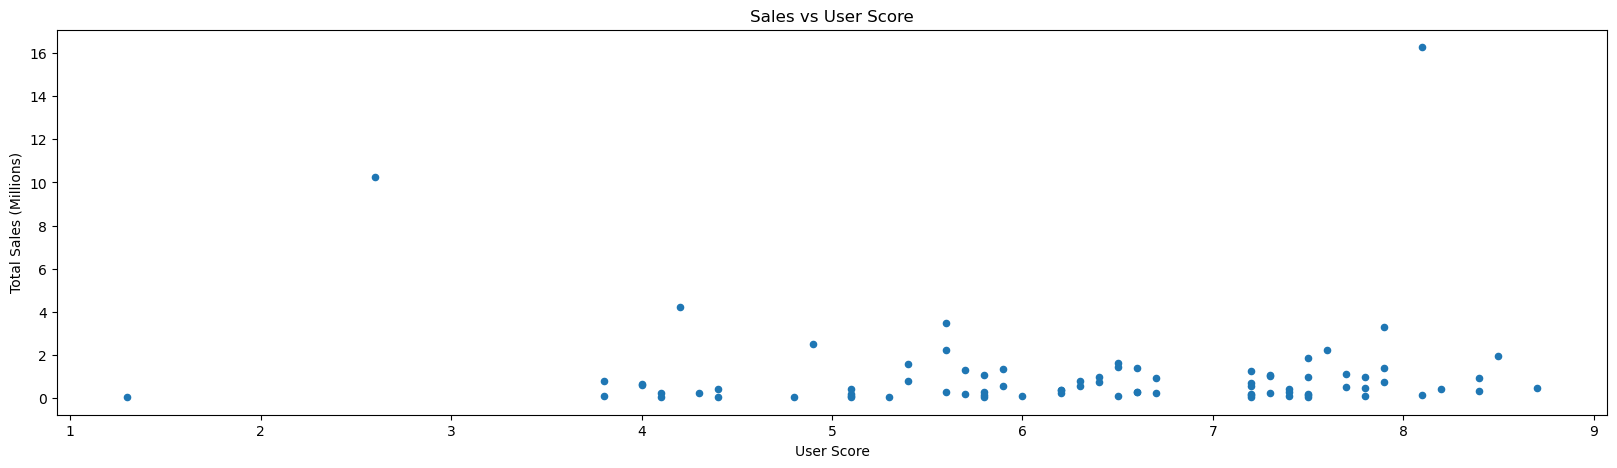

Correlation Coefficent (Sales vs User Score): -0.006238179532306317


In [17]:
# Plotting the second scatter plot with 'user_score' on x-axis and 'total_sales' on y-axis
x360_user = games_df[(games_df['platform'] == 'X360') & (games_df['critic_score'] != -1)]
fig, ax = plt.subplots(figsize=(20, 5))
x360_user.plot(x='user_score', y='total_sales', kind='scatter', title='Sales vs User Score', ax=ax)
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

print("Correlation Coefficent (Sales vs User Score):", x360_user['user_score'].corr(x360_user['total_sales']))

As we can see, there is an even weaker correlation between sales and user reviews, with a correlation coefficient of just -0.007. This is evident from both the visualization and the numerical data. Therefore, we can infer that user reviews, whether positive or negative, do not significantly impact the sales of Xbox 360 games. 

### Cross-Platform Sales Analysis

Now, let's begin a thorough comparison of game sales across different platforms. To ensure accuracy, our first step is to identify the top three games with availability across multiple platforms. By identifying the top three games available on multiple platforms, we can ensure our analysis is based on comprehensive and accurate data, setting a solid foundation for our comparison.

name
LEGO Marvel Super Heroes    9
FIFA 14                     9
LEGO Jurassic World         8
Name: platform, dtype: int64


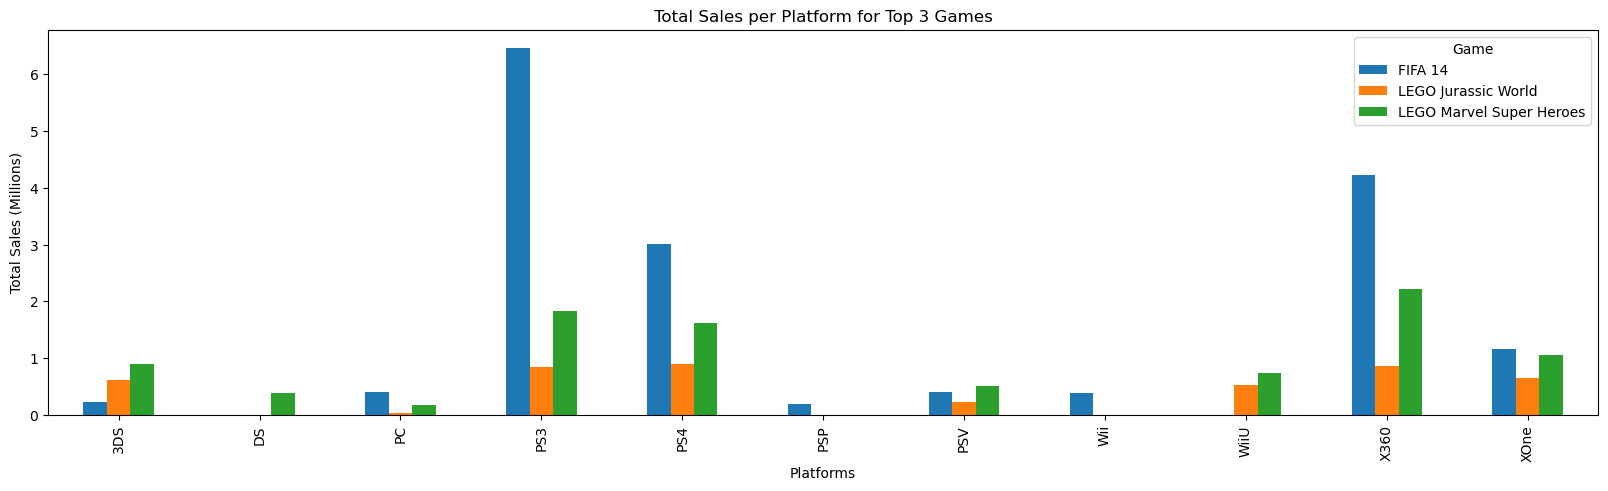

In [18]:
# Get the top 3 games that are availble to the most amount of gaming platforms
game_platform_counts = games_df.groupby('name')['platform'].nunique().sort_values(ascending=False)
three_games = game_platform_counts.head(3)
print(three_games)

# Filter the original DataFrame so that it only contains our chosen 3 games
three_plats_games_df = games_df[games_df['name'].isin(three_games.keys())]

# Plot
fig, ax = plt.subplots(figsize=(20, 5))
three_plats_games_df.groupby(['platform', 'name'])['total_sales'].sum().unstack().plot(kind='bar', ax=ax)
plt.title('Total Sales per Platform for Top 3 Games')
plt.xlabel('Platforms')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Game')
plt.show()

Upon examination of the sales data for 'FIFA 14', 'LEGO Jurassic World', and 'LEGO Marvel Super Heroes' across multiple gaming platforms, notable patterns emerge. 'FIFA 14' exhibited significant traction, particularly on PS3, PS4, and Xbox 360 platforms, indicating a strong affinity among gamers for these consoles. Following behind, 'LEGO Marvel Super Heroes' showcased popularity on the PS3, PS4, and Xbox 360 platforms as well. These insights strongly suggest that these gaming consoles were the preferred choices among gamers during the period under analysis. Understanding these preferences not only provides valuable market intelligence but also offers insights into consumer behavior within the gaming industry, facilitating informed decision-making for stakeholders.

### Most Profitable & Least Profitable Video Game Genres

Let's delve into the most and least profitable video game genres, and explore the insights and assumptions we can draw about these genres and the demographics that engage with them.

<Axes: title={'center': 'Average Game Sales for Each Platform'}, xlabel='Genres', ylabel='Average Game Sales'>

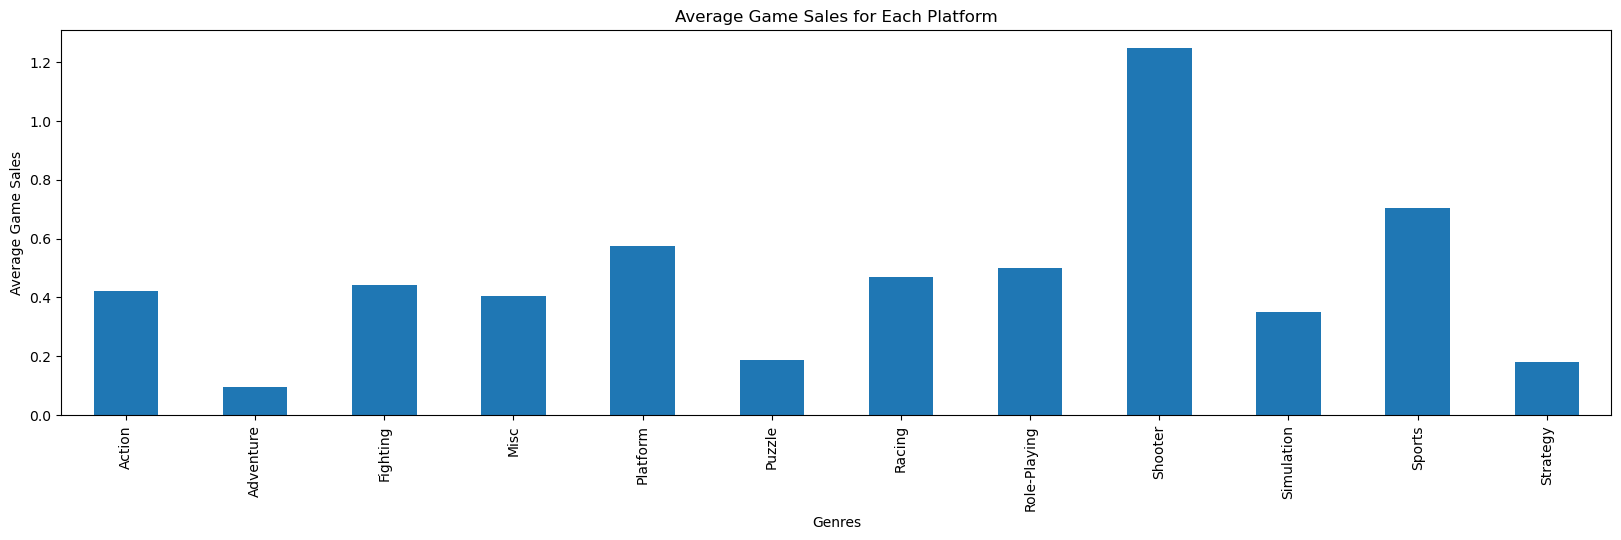

In [19]:
# Create a bar chart of average sales based on genre
fig, ax = plt.subplots(figsize=(20, 5))
games_df.groupby('genre')['total_sales'].mean().sort_index().plot(kind='bar', title='Average Game Sales for Each Platform', xlabel='Genres', ylabel='Average Game Sales', ax=ax)

The bar chart reveals shooter games as the most profitable, followed by sports and platform games, while puzzle, strategy, and adventure games rank lowest in sales. This popularity can be explained by shooter games leading in profitability due to their broad appeal, high production values, and robust multiplayer features, which foster strong community engagement and franchise loyalty. Sports games also benefit from significant marketing and annual releases, maintaining a large, dedicated fan base. Platform games, while not as lucrative as shooters or sports games, attract a wide range of players due to their accessible gameplay. In contrast, puzzle, strategy, and adventure games cater to niche audiences and often have lower production budgets and marketing efforts, resulting in lower sales. Additionally, the limited replay value and infrequent releases of these genres contribute to their reduced profitability. Action and sports games attract diverse audiences with their engaging gameplay and competitive elements, whereas shooters appeal predominantly to younger males. Puzzle games target casual gamers, while strategy games attract a niche audience. Higher sales in action, sports, and shooters may be attributed to larger production budgets and broader marketing. Overall, games with broad appeal and competitive features tend to be most profitable, while niche genres like strategy and puzzle games lag behind.

## Video Games & Regions

Let's identify the top five platforms in each region (North America, Europe, Japan) by analyzing total game sales on each platform. By utilizing sales figures as a metric, we can ascertain the most prominent platforms in each region.

### Most Popular Gaming Platform by Region

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64



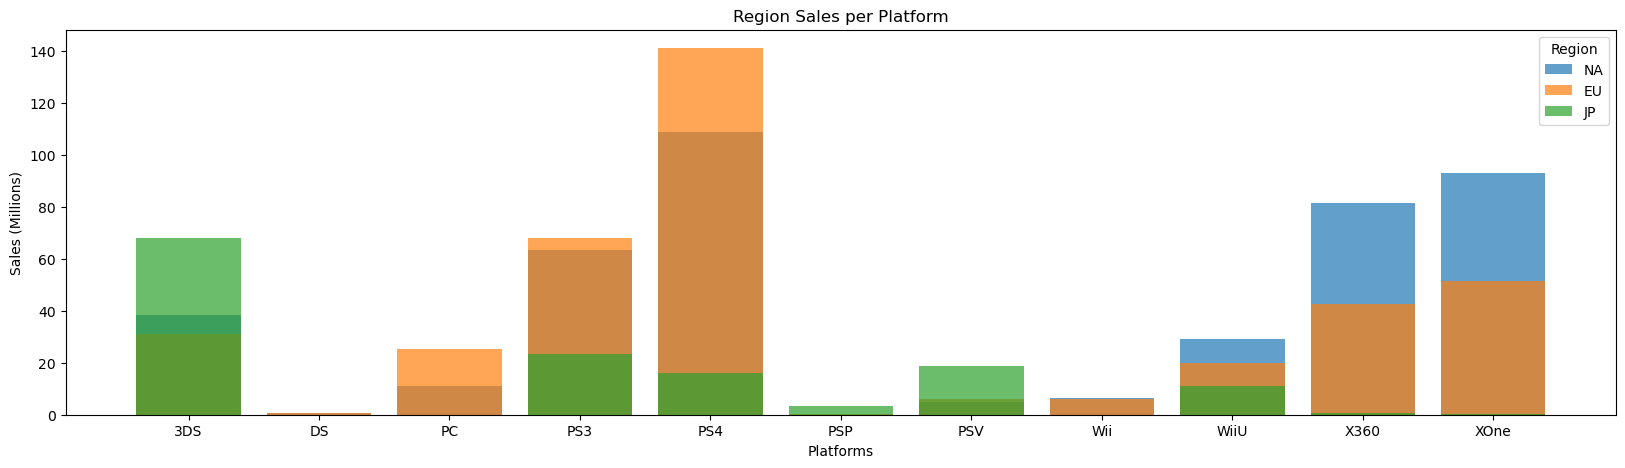

In [20]:
# Group by platform and sum sales for each region

# North America
top_5_plat_na = games_df.groupby('platform')['na_sales'].sum()
print(top_5_plat_na.sort_values(ascending=False).head())
print()

# Europe
top_5_plat_eu = games_df.groupby('platform')['eu_sales'].sum()
print(top_5_plat_eu.sort_values(ascending=False).head())
print()

# Japan
top_5_plat_jp = games_df.groupby('platform')['jp_sales'].sum()
print(top_5_plat_jp.sort_values(ascending=False).head())
print()

# Plot
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(top_5_plat_na.index, top_5_plat_na, label='NA', alpha=0.7)
plt.bar(top_5_plat_eu.index, top_5_plat_eu, label='EU', alpha=0.7)
plt.bar(top_5_plat_jp.index, top_5_plat_jp, label='JP', alpha=0.7)

plt.title('Region Sales per Platform')
plt.xlabel('Platforms')
plt.ylabel('Sales (Millions)')
plt.legend(title='Region')
plt.show()

We can see from the sales data and visualization that the PS4 is the dominant platform in both North America and Europe, reflecting its widespread popularity and strong market presence. The Xbox One also shows significant sales in both regions, though it lags behind the PS4. Notably, the Xbox 360 and PS3 still maintain considerable sales, showcasing the enduring appeal of older console generations. In Japan, the 3DS leads by a substantial margin, highlighting the region's preference for handheld gaming devices. The PS Vita and Wii U also feature prominently in Japan, indicating a distinct market preference for portable and unique gaming experiences compared to Western markets.

### Most Popular Game Genres by Region

Now, let's identify the top five genres in each region (North America, Europe, Japan) by analyzing the total game sales of each genre in a particular region.

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64



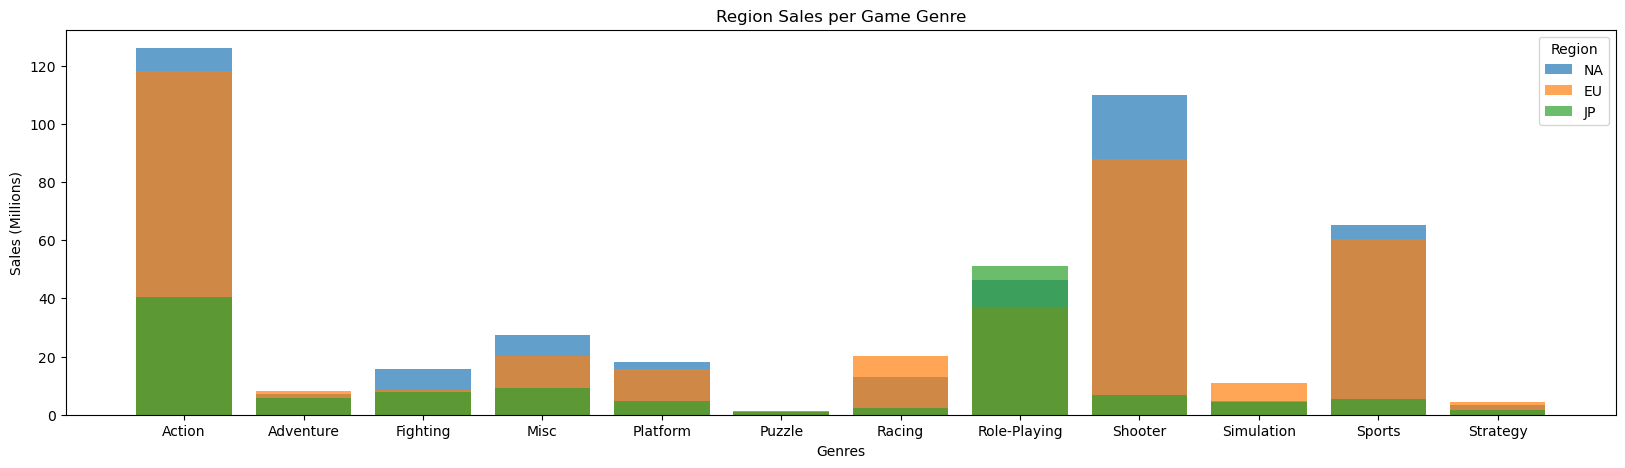

In [21]:
# Group by genre and sum sales for each region

# North America
na_genre_sales = games_df.groupby('genre')['na_sales'].sum()
print(na_genre_sales.sort_values(ascending=False).head())
print()

# Europe
eu_genre_sales = games_df.groupby('genre')['eu_sales'].sum()
print(eu_genre_sales.sort_values(ascending=False).head())
print()

# Japan
jp_genre_sales = games_df.groupby('genre')['jp_sales'].sum()
print(jp_genre_sales.sort_values(ascending=False).head())
print()

# Plot
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(na_genre_sales.index, na_genre_sales, label='NA', alpha=0.7)
plt.bar(eu_genre_sales.index, eu_genre_sales, label='EU', alpha=0.7)
plt.bar(jp_genre_sales.index, jp_genre_sales, label='JP', alpha=0.7)

plt.title('Region Sales per Game Genre')
plt.xlabel('Genres')
plt.ylabel('Sales (Millions)')
plt.legend(title='Region')
plt.show()

In North America, the gaming landscape is dominated by Action, Shooters, and Sport genres, mirroring a similar trend in Europe. This alignment in gaming preferences underscores the striking similarity between these two regions. Conversely, in Japan, gamers gravitate towards Role-playing and Action genres, highlighting a unique gaming culture that distinguishes it from its Western counterparts.

### ESRB Ratings vs Regional Sales

Finally, let's determine what the top 5 ESRB ratings in each region are. We can use this information to forumlate hypotheses in regard to how ESRB ratings affect profit.

rating
M       165.21
U        89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

rating
M       145.32
E        83.36
U        78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

rating
U       85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64



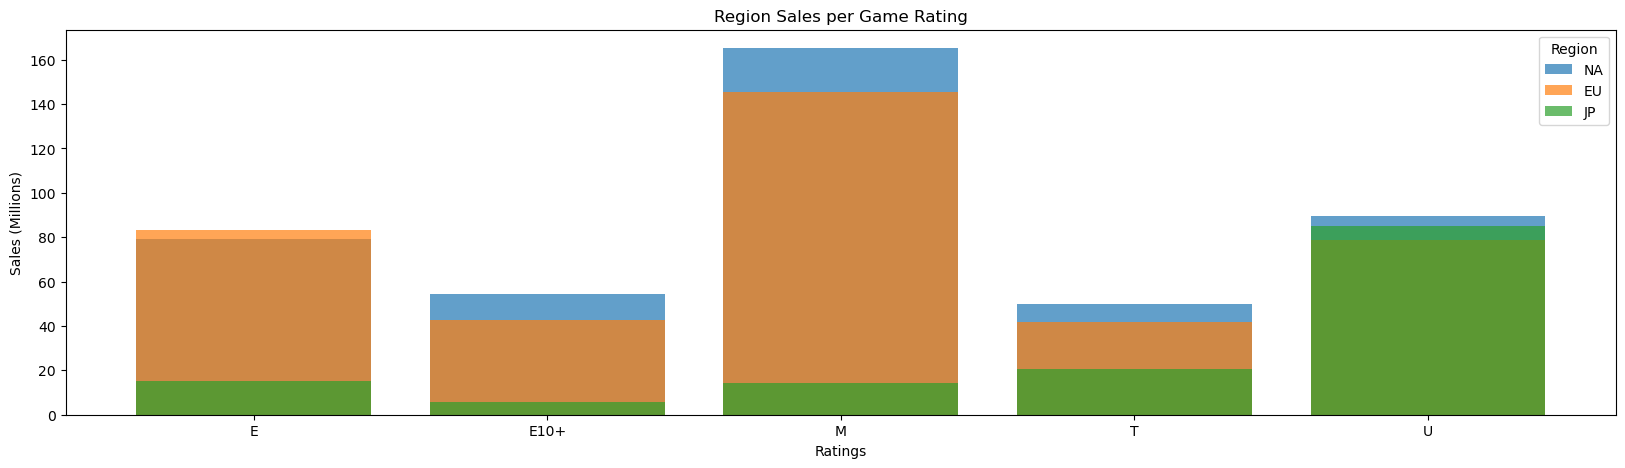

In [22]:
# Group by rating and sum sales for each region

# North America
na_rating_sales = games_df.groupby('rating')['na_sales'].sum()
print(na_rating_sales.sort_values(ascending=False).head())
print()

# Europe
eu_rating_sales = games_df.groupby('rating')['eu_sales'].sum()
print(eu_rating_sales.sort_values(ascending=False).head())
print()

# Japan
jp_rating_sales = games_df.groupby('rating')['jp_sales'].sum()
print(jp_rating_sales.sort_values(ascending=False).head())
print()

# Plot
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(na_rating_sales.index, na_rating_sales, label='NA', alpha=0.7)
plt.bar(eu_rating_sales.index, eu_rating_sales, label='EU', alpha=0.7)
plt.bar(jp_rating_sales.index, jp_rating_sales, label='JP', alpha=0.7)

plt.title('Region Sales per Game Rating')
plt.xlabel('Ratings')
plt.ylabel('Sales (Millions)')
plt.legend(title='Region')
plt.show()


The sales data by ESRB rating reveals distinct regional preferences. In North America, games rated 'M' (Mature) are the most popular, followed by 'U' (Unknown) and 'E' (Everyone), suggesting a strong market for mature content. Similarly, in Europe, 'M' rated games lead in sales, with 'E' and 'U' ratings following closely, indicating a comparable demand for mature games. Conversely, in Japan, 'U' rated games dominate the market, significantly outperforming other ratings, and indicating a preference for content not clearly defined by the ESRB system. 'T' (Teen) rated games are more popular in Japan compared to North America and Europe, highlighting regional differences in gaming preferences. Overall, while mature games dominate Western markets, Japan shows a unique trend favoring games with unknown ratings and a broader acceptance of teen-rated content.

The prominence of 'U' (Unknown) rated games in Japan's sales data suggests several insights about the rating system and market dynamics in the region. Unlike North America and Europe, where the ESRB (Entertainment Software Rating Board) ratings are widely used and recognized, Japan relies on different rating organizations such as CERO (Computer Entertainment Rating Organization). Consequently, many games released in Japan might not carry ESRB ratings at all, leading them to be classified as 'U' (Unknown) in datasets primarily structured around ESRB ratings. This indicates that the ESRB system is not fully applicable or reflective of the Japanese market, where local rating practices and consumer preferences prevail. Therefore, the high sales of 'U' rated games underscore the distinct regulatory environment and market characteristics in Japan, highlighting the importance of considering regional rating systems when analyzing global sales data.

## Test Hypotheses

We will now test the hypothesis that the average user ratings of the Xbox One and PC platforms are the same. We will do so using via independent samples t-test.

Before we begin our test we need to forumate a null and alternative hypothesis. For the comparison of average user ratings between the Xbox One and PC platforms, the null hypothesis (H0) states that the mean user ratings for both platforms are equal, while the alternative hypothesis (H1) suggests they are not equal.

To conduct the hypothesis test, I chose a significance level (alpha) of 0.05. This significance level was selected as it provides a balanced approach, allowing for a reasonable chance of detecting real differences without overly increasing the risk of making Type I errors, where we reject a true null hypothesis. 

In [23]:
# Test the hypotheses
  
 #h0 = Average user ratings of the Xbox One and PC platforms are the same. 
 #h1 = Average user ratings of the Xbox One and PC platforms are NOT the same. 

xbox_one_avg_rate = games_df[games_df['platform'] == 'XOne']['user_score']
pc_avg_rate = games_df[games_df['platform'] == 'PC']['user_score']

# Perform independent samples t-test
results = st.ttest_ind(xbox_one_avg_rate, pc_avg_rate)

print('p-value:', results.pvalue)
print()

# Check the p-value against alpha
alpha = 0.05

if results.pvalue < alpha:
    print("We reject the null hypothesis.")

else:
    print("We cannot reject the null hypothesis.")

p-value: 0.20111399900783603

We cannot reject the null hypothesis.



With a p-value of 0.2, which is greater than the chosen significance level of 0.05, we cannot reject the null hypothesis. This suggests that there is not a statistically significant difference in average user ratings between the Xbox One and PC platforms. Therefore, we can conclude that the average user ratings for these two platforms are the same.

We will now test the hypothesis that the average user ratings for the Action and Sports genres are different. We will conduct an independent samples t-test again.

The null hypothesis (H0) posits that the mean user ratings for both genres are the same, while the alternative hypothesis (H1) suggests they are different. The significance value (0.05) was chosen for the same reason stated in the previous test.

In [24]:
# Test the hypotheses
  
 #h0 = Average user ratings for the Action and Sports genres are the same.
 #h1 = Average user ratings for the Action and Sports genres are NOT the same.

act_avg_rate = games_df[games_df['genre'] == 'Action']['user_score']
sprt_avg_rate = games_df[games_df['genre'] == 'Sports']['user_score']

# Perform independent samples t-test
results = st.ttest_ind(act_avg_rate, sprt_avg_rate, nan_policy='omit')

print('p-value:', results.pvalue)
print()

# Check the p-value against alpha
alpha = 0.05

if results.pvalue < alpha:
    print("We reject the null hypothesis.")

else:
    print("We cannot reject the null hypothesis.")

p-value: 0.02193663336455412

We reject the null hypothesis.


With a p-value of 0.02, which is less than the significance level of 0.05, we reject the null hypothesis. Therefore, we conclude that there is a statistically significant difference in average user ratings between the Action and Sports genres. Thus, we accept the alternative hypothesis that the average user ratings for these two genres are not the same.

## Conclusion

Through an exhaustive analysis encompassing various facets of the gaming industry, several key insights have emerged. Initially, an examination of game release trends spanning from the 1990s to the mid-2010s revealed a significant surge in releases, particularly peaking around 2008 and 2009. Subsequent scrutiny of sales across top gaming platforms elucidated distinctive trajectories, with platforms like the PS2 demonstrating remarkable longevity, while the Wii enjoyed a robust start driven by innovative gameplay mechanics. Refocusing the analysis from 2006 onwards provided a sharper perspective, coinciding with periods of peak profitability and the introduction of new gaming consoles. Further exploration into the impact of user and professional reviews on Xbox 360 game sales underscored a weak correlation, indicating that critical acclaim or user praise alone may not guarantee commercial success. Comparison of game sales across platforms unveiled preferences for specific consoles during the analyzed period, with titles like 'FIFA 14' and 'LEGO Marvel Super Heroes' exhibiting significant traction on platforms like PS3, PS4, and Xbox 360. Examination of genre profitability highlighted shooters, sports, and platforms as frontrunners, attracting diverse audiences and commanding substantial sales volumes. Geographical disparities in platform and genre preferences were evident, with North America and Europe favoring action-oriented genres, while Japan leaned towards role-playing games. Finally, an assessment of ESRB ratings across regions revealed a prevalence of 'E', 'M', and 'T' ratings, reflective of varied demographic compositions and cultural nuances. Hypothesis testing further affirmed and unaffrimed distinctions, with no statistically significant differences observed in average user ratings in regard to platforms, but rather with genres. Collectively, these findings provide a comprehensive understanding of the gaming landscape, offering valuable insights for stakeholders to make informed decisions and navigate an ever-evolving industry landscape.